Mispricing happens when the market price is different than what a model says the price should be.

If the price of an option is $1.50 and the model shows it should be $1.75, a trader would buy the option “cheap” and wait for it to rise to $1.75.

Derivatives models use volatility to determine the value. So quants spend most of their time building the best volatility forecasts they can to find market mispricings.

Stock returns have two interesting features that GARCH models well:

1. Variance error terms are autocorrelated (dependent on each other)
2. Periods of high volatility tend to cluster

In [2]:
pip install arch

  Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import yfinance as yf 
from arch import arch_model

In [4]:
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(16, 6))
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [7]:
data = yf.download("AAPL", start="2020-01-01", end="2022-07-31", auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [ ]:
adjusted_close = data["Adj Close"]
returns = 100 * adjusted_close.pct_change().dropna()

In [12]:
model = arch_model(returns)

Calling arch_model like this does three things:

1. Uses a constant mean
2. Assumes a GARCH(1, 0, 1) volatility model
3. Uses a normal distribution for the standardized errors

In [13]:
res = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2574.742743838462
Iteration:      2,   Func. Count:     15,   Neg. LLF: 22626.764695826634
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1786.8116305427575
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1628.7566853775584
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1391.3554836072485
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1386.0236890127806
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1386.0230562289007
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1386.0230253099821
Iteration:      9,   Func. Count:     57,   Neg. LLF: 1386.0230244880222
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1386.0230244880222
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9


In [14]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1386.02
Distribution:                  Normal   AIC:                           2780.05
Method:            Maximum Likelihood   BIC:                           2797.94
                                        No. Observations:                  648
Date:                Sat, May 17 2025   Df Residuals:                      647
Time:                        15:50:36   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2180  7.860e-02      2.774  5.541e-03 [6.397e-0

It shows the statistical significance of each of the coefficients. They all have very small p-values. We can assume the results are not due to random chance.

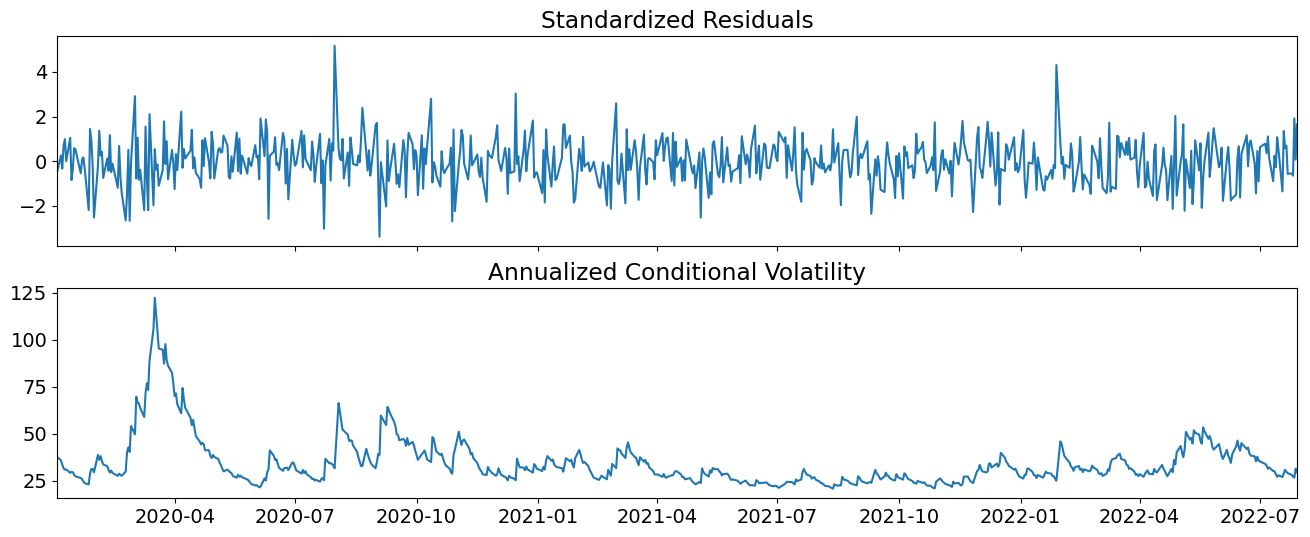

In [15]:
fig = res.plot("D")

In [16]:
# get the variance forecast
forecast = res.forecast(horizon=1, reindex=False)
variance_forecast = forecast.variance.iloc[-1][0]

# compute the annualized volatility forecast
volatility_forecast = np.sqrt(variance_forecast)
annualized_volatility_forecast = volatility_forecast * np.sqrt(252) / 100

C:\Users\krish\AppData\Local\Temp\ipykernel_15428\3459304533.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  variance_forecast = forecast.variance.iloc[-1][0]


FINDINGG A MISPRICING

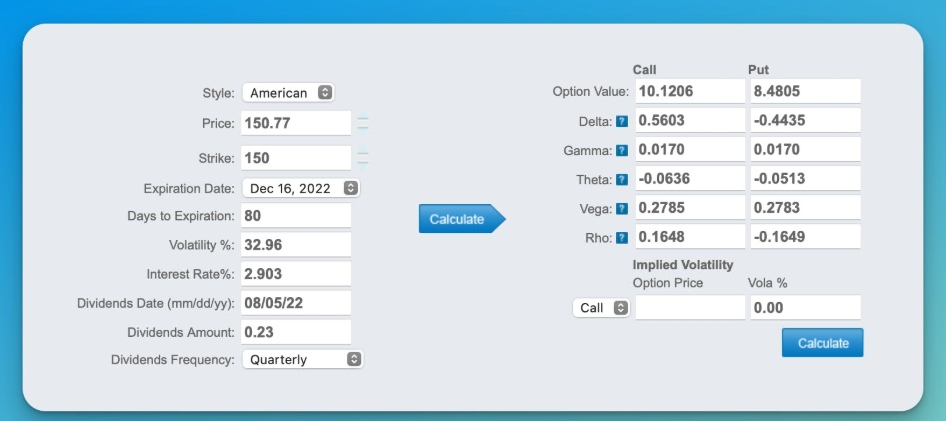

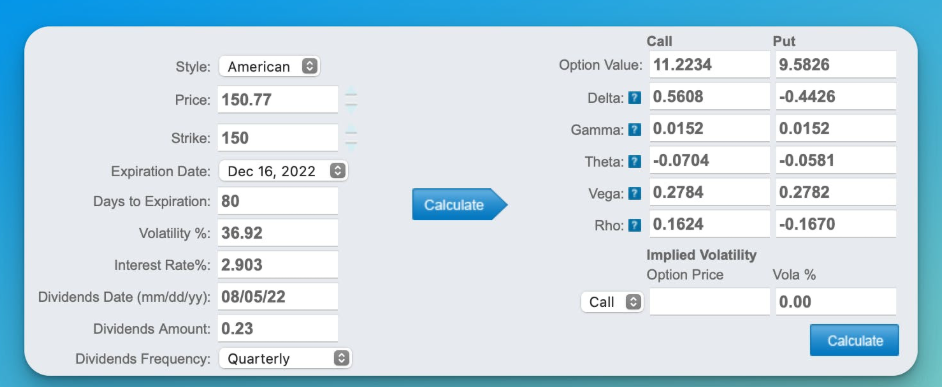